# Курсовое задание на расчёт физических характеристик спектрометра реакторных антинейтрино в пакете Монте-Карло GEANT4


В качестве детектора антинейтрино от ядерного реактора используется сцинтиллятор
на основе линейного алкилбензола (ЛАБ) с сцинтилляционной добавкой PPO (3 г/л) и солью
гадолиния с концентрацией гадолиния в сцинтилляторе 0.5 грамм/литр. Антинейтрино
регистрируются в реакции обратного бета распада антинейтрино на протоне (водороде в
составе ЛАБ). 

Сцинтиллятор объемом 1 м3 размещается в сферическом сосуде из
полиметилметакрилата (ПММА) с толшиной стенок 10 мм. Сфера со сцинтиллятором
расположена в центре цилиндрического бака из нержавеющей стали с внутренними
размерами: диаметр=высоте=1858 мм (толщина стали 2 мм), заполненного линейным
алкилбензолом (ЛАБ) без сцинтилляционных добавок. Внутри бака по вершинам
правильного многоугольника (додекаэдра либо икосаэдра) расположены фотоэлектронные
умножители (ФЭУ) марки Hamamatsu R5912. Световыход сцинтиллятора — 5000
фотонов/МэВ, прозрачность сцинтиллятора 5 метров, прозрачность ЛАБ 12 метров,
квантовая эффективность ФЭУ 28%.

***Конструкция детектора (икосаэдр)***

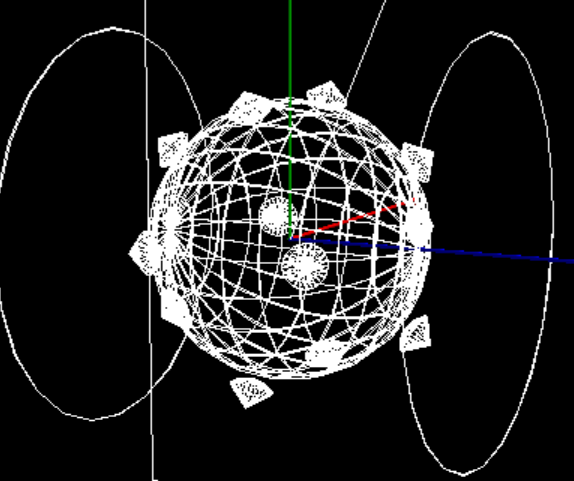
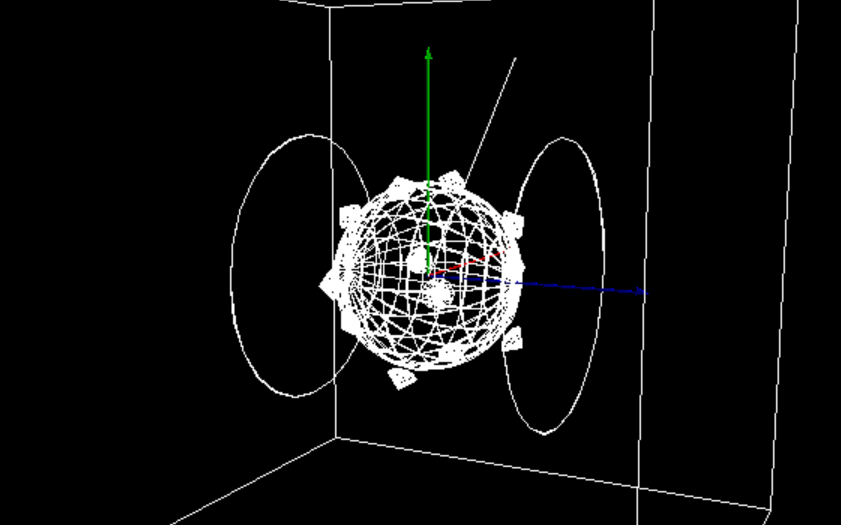

In [70]:
# импорт библиотек для анализа
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1. Функция отклика детектора (и энергетическое разрешение) электронов с энергией 1 Мэв


In [104]:
df1 = pd.read_csv('/home/alina_van/project/results.csv')

In [105]:
df1

,x,y,z,count
0,-5.08411,-480.25300,-260.7080,51
1,322.57100,-402.78800,187.0730,53
2,-139.08600,-354.82200,196.0320,52
3,-235.02400,233.01200,145.3420,63
4,212.13100,505.89800,177.4050,69
...,...,...,...,...
299996,-162.26200,-405.70600,337.5710,53
299997,-201.92400,-93.85780,-458.5610,50
299998,470.49500,-137.96200,-97.5839,64
299999,-533.96400,-8.83972,-109.0070,71


Text(-12.805555555555555, 0.5, 'frequency')

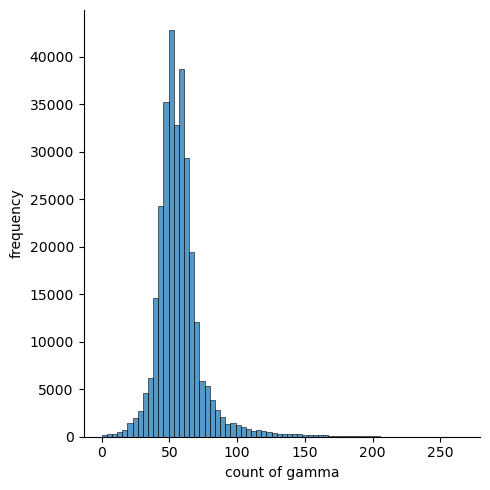

In [106]:
sns.displot(x='count', data =df1, bins=70)
plt.xlabel('count of gamma')
plt.ylabel('frequency')

/tmp/ipykernel_509357/303565549.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfX = df1[['binX', 'count']].groupby('binX').mean().reset_index()
/tmp/ipykernel_509357/303565549.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfX['std'] = df1[['binX', 'count']].groupby('binX')['count'].std()


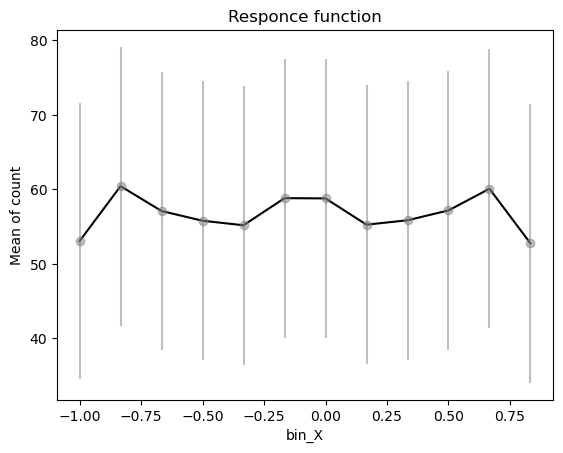

In [107]:
binX = np.arange(-630, 630, 105)
bins = pd.IntervalIndex.from_tuples([(i, i+105) for i in binX])
df1['binX'] = pd.cut(df1.x, bins)
dfX = df1[['binX', 'count']].groupby('binX').mean().reset_index()
dfX['std'] = df1[['binX', 'count']].groupby('binX')['count'].std()
dfX['binX_c'] = np.arange(-1, 1, 2/12)
ax = sns.lineplot(x='binX_c', y='count', data=dfX, color = 'black')
ax.errorbar(x='binX_c', y='count', yerr='std', data=dfX, fmt='o', color='gray', alpha=0.5)
plt.xlabel('bin_X')
plt.ylabel('Mean of count')
plt.title('Responce function')
plt.show()

/tmp/ipykernel_509357/2769438549.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfY = df1[['binY', 'count']].groupby('binY').mean().reset_index()
/tmp/ipykernel_509357/2769438549.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfY['std'] = df1[['binY', 'count']].groupby('binY')['count'].std()


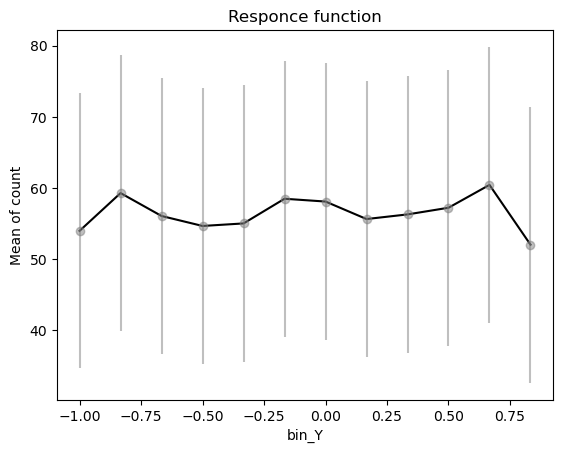

In [101]:
binY = np.arange(-630, 630, 105)
bins = pd.IntervalIndex.from_tuples([(i, i+105) for i in binY])
df1['binY'] = pd.cut(df1.y, bins)
dfY = df1[['binY', 'count']].groupby('binY').mean().reset_index()
dfY['std'] = df1[['binY', 'count']].groupby('binY')['count'].std()
dfY['binY_c'] = np.arange(-1, 1, 2/12)
ax = sns.lineplot(x='binY_c', y='count', data=dfY, color = 'black')
ax.errorbar(x='binY_c', y='count', yerr='std', data=dfY, fmt='o', color='gray', alpha=0.5)
plt.xlabel('bin_Y')
plt.ylabel('Mean of count')
plt.title('Responce function')
plt.show()

/tmp/ipykernel_509357/3173290105.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfz = df1[['binz', 'count']].groupby('binz').mean().reset_index()
/tmp/ipykernel_509357/3173290105.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfz['std'] = df1[['binz', 'count']].groupby('binz')['count'].std()


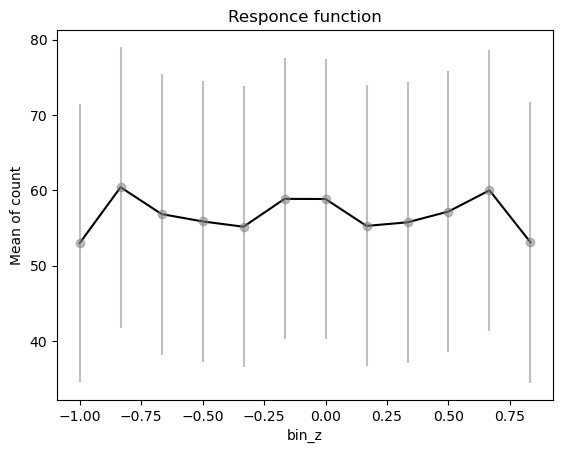

In [109]:
binz = np.arange(-630, 630, 105)
bins = pd.IntervalIndex.from_tuples([(i, i+105) for i in binz])
df1['binz'] = pd.cut(df1.z, bins)
dfz = df1[['binz', 'count']].groupby('binz').mean().reset_index()
dfz['std'] = df1[['binz', 'count']].groupby('binz')['count'].std()
dfz['binz_c'] = np.arange(-1, 1, 2/12)
ax = sns.lineplot(x='binz_c', y='count', data=dfz, color = 'black')
ax.errorbar(x='binz_c', y='count', yerr='std', data=dfz, fmt='o', color='gray', alpha=0.5)
plt.xlabel('bin_z')
plt.ylabel('Mean of count')
plt.title('Responce function')
plt.show()